# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
pre_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"
url = f"{pre_url}units={units}&APPID={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paranaiba
Processing Record 2 of Set 1 | afaahiti
Processing Record 3 of Set 1 | enewetak
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | saipan
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | sinabang
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | ormara
Processing Record 15 of Set 1 | sinjar
Processing Record 16 of Set 1 | korem
Processing Record 17 of Set 1 | waingapu
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | constantia
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | nacala
Processing Record 22 of Set 1 | tranovaho
City not found. Skipping

Processing Record 37 of Set 4 | touros
Processing Record 38 of Set 4 | talnakh
Processing Record 39 of Set 4 | tsiombe
Processing Record 40 of Set 4 | high river
Processing Record 41 of Set 4 | kulia village
City not found. Skipping...
Processing Record 42 of Set 4 | sechura
Processing Record 43 of Set 4 | vinton
Processing Record 44 of Set 4 | el galpon
Processing Record 45 of Set 4 | yandev
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | saurimo
Processing Record 48 of Set 4 | kayangel
Processing Record 49 of Set 4 | saint-francois
Processing Record 0 of Set 5 | cepin
Processing Record 1 of Set 5 | agar
Processing Record 2 of Set 5 | el calafate
Processing Record 3 of Set 5 | bada barabil
Processing Record 4 of Set 5 | pemangkat
Processing Record 5 of Set 5 | varna
Processing Record 6 of Set 5 | karratha
Processing Record 7 of Set 5 | japekrom
City not found. Skipping...
Processing Record 8 of Set 5 | gadzhiyevo
Processing Record 9 of Set 5 | castillos
Processin

Processing Record 25 of Set 8 | trincomalee
Processing Record 26 of Set 8 | ponnani
Processing Record 27 of Set 8 | saintes
Processing Record 28 of Set 8 | cauquenes
Processing Record 29 of Set 8 | mansa
Processing Record 30 of Set 8 | cartagena
Processing Record 31 of Set 8 | navia
Processing Record 32 of Set 8 | shimoda
Processing Record 33 of Set 8 | dunbar
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | upata
Processing Record 36 of Set 8 | adilcevaz
Processing Record 37 of Set 8 | griffith
Processing Record 38 of Set 8 | nsanje
Processing Record 39 of Set 8 | christchurch
Processing Record 40 of Set 8 | plouzane
Processing Record 41 of Set 8 | novyy urgal
Processing Record 42 of Set 8 | crotone
Processing Record 43 of Set 8 | ribeiropolis
Processing Record 44 of Set 8 | gulbene
Processing Record 45 of Set 8 | north platte
Processing Record 46 of Set 8 | karamay
City not found. Skipping...
Processing Record 47 of Set 8 | gary
Processing Record 48 of Set 8 |

Processing Record 15 of Set 12 | sisimiut
Processing Record 16 of Set 12 | geraldton
Processing Record 17 of Set 12 | say
Processing Record 18 of Set 12 | kralendijk
Processing Record 19 of Set 12 | forde
Processing Record 20 of Set 12 | chapaev
Processing Record 21 of Set 12 | rio preto da eva
Processing Record 22 of Set 12 | adre
Processing Record 23 of Set 12 | kwang binh
Processing Record 24 of Set 12 | yeppoon
Processing Record 25 of Set 12 | ca mau
Processing Record 26 of Set 12 | bayganin
Processing Record 27 of Set 12 | cameta
Processing Record 28 of Set 12 | altamira
Processing Record 29 of Set 12 | kamennomostskoye
Processing Record 30 of Set 12 | mandalgovi
Processing Record 31 of Set 12 | ketchikan
Processing Record 32 of Set 12 | lhokseumawe
Processing Record 33 of Set 12 | marquette
Processing Record 34 of Set 12 | ambon
Processing Record 35 of Set 12 | pariaman
Processing Record 36 of Set 12 | la ligua
Processing Record 37 of Set 12 | nieuw amsterdam
Processing Record 38

In [3]:
# Set the API base URL
url = # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | colorado
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | dobryanka
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | avarua
Processing Record 23 of

Processing Record 33 of Set 4 | belmonte
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | ambilobe
Processing Record 36 of Set 4 | aripuana
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | lesnoy
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | danielskuil
Processing Record 44 of Set 4 | chunhuhub
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | ouallam
Processing Record 47 of Set 4 | challapata
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | olafsvik
Processing Record 0 of Set 5 | neepawa
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | ugra
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paranaiba,-19.6772,-51.1908,28.39,50,53,2.19,BR,1704671844
1,afaahiti,-17.7500,-149.2833,28.93,81,53,4.67,PF,1704671845
2,enewetak,11.3474,162.3373,27.11,70,7,9.47,MH,1704671846
3,puerto ayora,-0.7393,-90.3518,25.86,93,100,1.79,EC,1704671846
4,saipan,15.1355,145.7010,28.39,83,40,7.20,MP,1704671847


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paranaiba,-19.6772,-51.1908,28.39,50,53,2.19,BR,1704671844
1,afaahiti,-17.7500,-149.2833,28.93,81,53,4.67,PF,1704671845
2,enewetak,11.3474,162.3373,27.11,70,7,9.47,MH,1704671846
3,puerto ayora,-0.7393,-90.3518,25.86,93,100,1.79,EC,1704671846
4,saipan,15.1355,145.7010,28.39,83,40,7.20,MP,1704671847


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

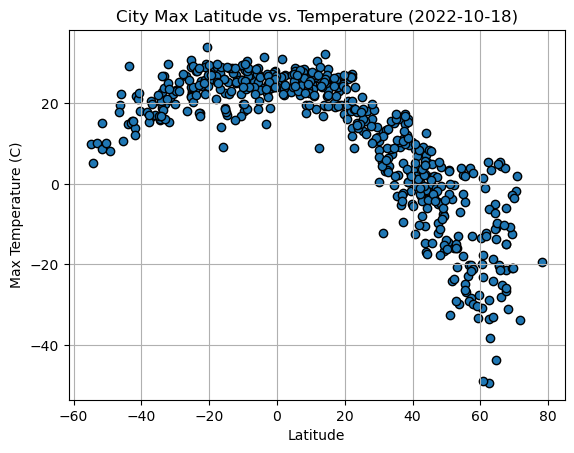

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values,y_values, edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("../output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

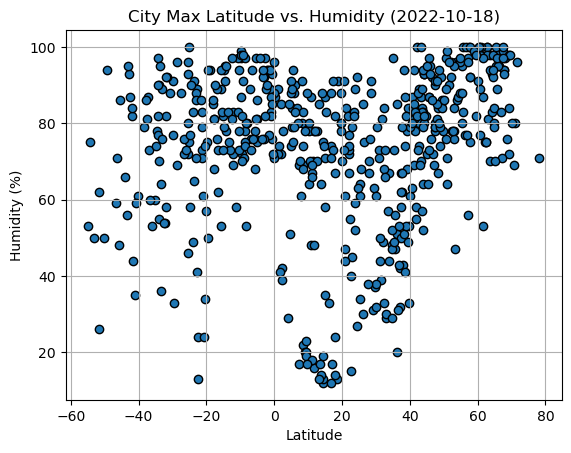

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values,y_values, edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

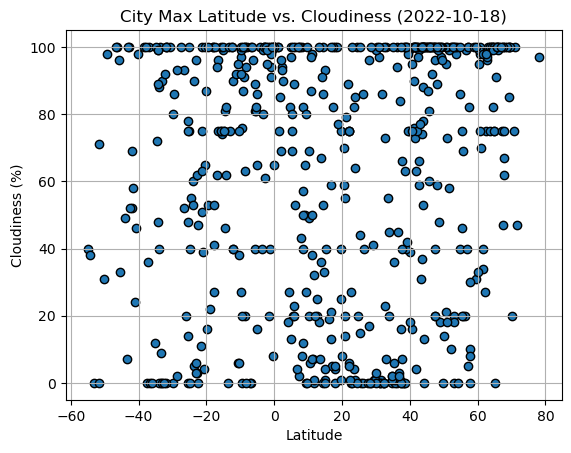

In [11]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values, edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

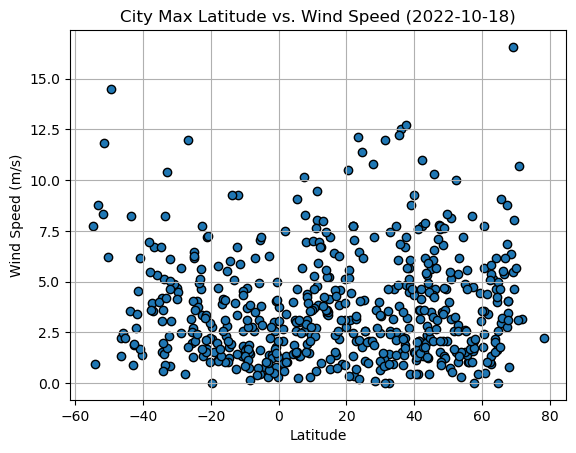

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values, edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def lin_regress_line(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_function = f"y = {slope}x + {intercept}"
        return line_function

def regress_line(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        return regress_values

def r_value(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        return rvalue

The r-value is: 0.5697364952800517


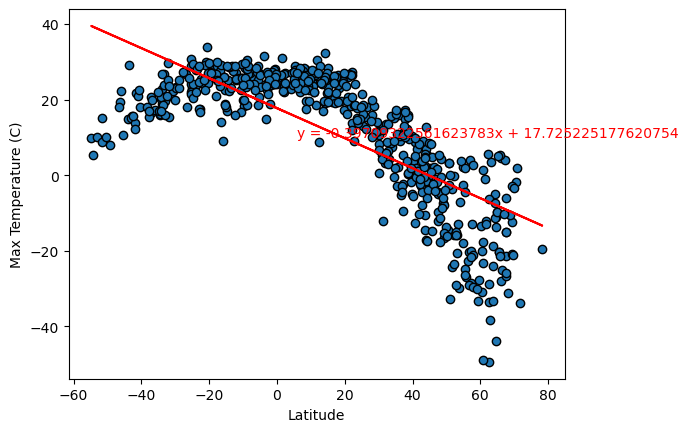

In [24]:
# test your functions to show that it works

# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values,y_values, edgecolors = "black")

#Use functions to find values
line_function = lin_regress_line(x_values, y_values)
regress_values = regress_line(x_values, y_values)
rvalue = r_value(x_values, y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_function,(6,10),fontsize=10,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')


# Show plot
plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,enewetak,11.3474,162.3373,27.11,70,7,9.47,MH,1704671846
4,saipan,15.1355,145.7010,28.39,83,40,7.20,MP,1704671847
5,petropavlovsk-kamchatsky,53.0452,158.6483,-15.86,78,20,5.36,RU,1704671847
6,sitka,57.0531,-135.3300,3.94,56,100,8.23,US,1704671848
7,sinabang,2.4803,96.3801,27.07,78,90,1.04,ID,1704671849


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paranaiba,-19.6772,-51.1908,28.39,50,53,2.19,BR,1704671844
1,afaahiti,-17.7500,-149.2833,28.93,81,53,4.67,PF,1704671845
3,puerto ayora,-0.7393,-90.3518,25.86,93,100,1.79,EC,1704671846
8,ushuaia,-54.8000,-68.3000,9.81,53,40,7.72,AR,1704671849
10,adamstown,-25.0660,-130.1015,22.61,75,100,6.44,PN,1704671851


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7528658851728833


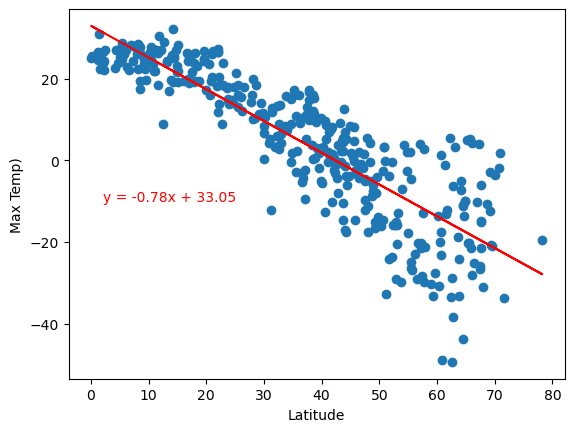

In [32]:
# Run linear regression
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")
plt.scatter(x_values,y_values)

#labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp)')

#Run Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-10),fontsize=10,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.3088300095539568


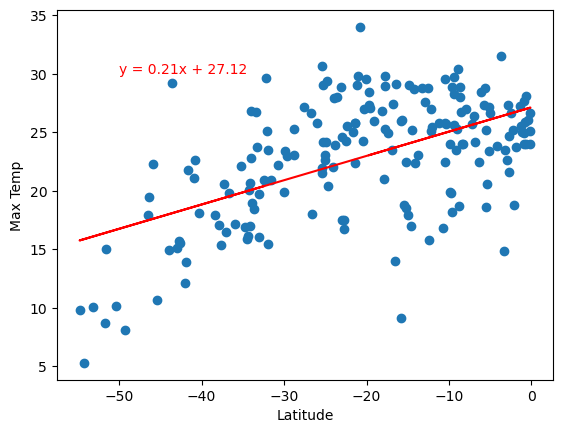

In [37]:
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")
plt.scatter(x_values,y_values)

#labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#Run Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=10,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Northern Hemisphere dataset shows a decrease of Max Temp as the Latitude increases. The values correlate quite strongly with a pretty high r-value and it being quite clustered and then being slightly more spread as you get to larger latitudes. The points are also quite linear with the values decreasing at a steady rate alongside latitude being increased.

The Southern Hemisphere dataset shows an increase of Max Temp as the Latitude increases. The values dont correlate quite as strongly with it being more spread, a smaller r-value and slightly more tight as you get to larger latitudes. The points are slightly linear with the values decreasing at a steady rate alongside latitude being increased.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18556493620352607


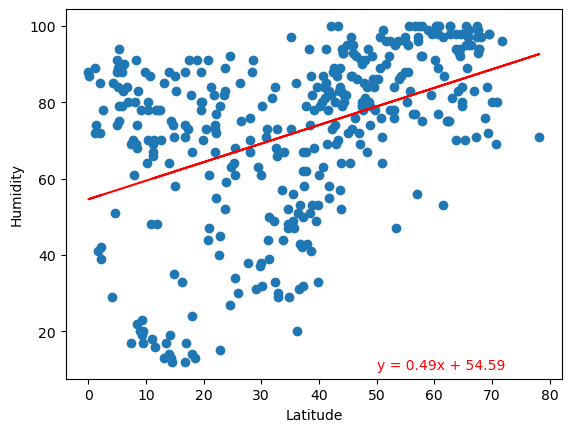

In [38]:
# Build scatter plot for latitude vs. Humidity
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Run Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.1192609895743718


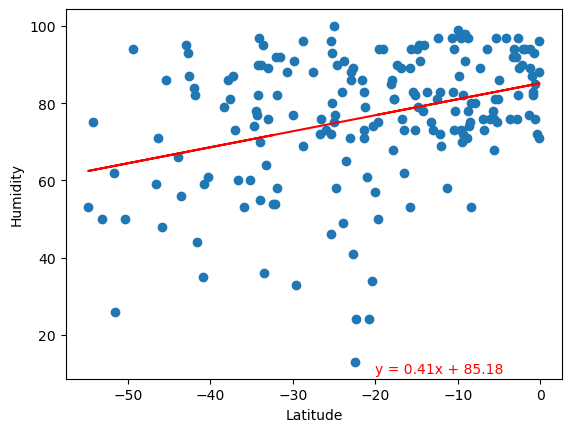

In [40]:
# Build scatter plot for latitude vs. Humidity
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Run Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=10,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Northern Hemisphere dataset shows an increase of humidity as the Latitude increases. The values do not have much correlation with a low r-value and it being slightly more clustered as you get to larger latitudes. The points are not quite linear with the humidity values only showing a slight increase with the latitude.

The Southern Hemisphere dataset shows an increase of humidity as the Latitude increases. The values do not have much correlation with a low r-value and it being slightly more clustered as you get to larger latitudes. The points are not quite linear with the humidity values only showing a slight increase with the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06340778466316468


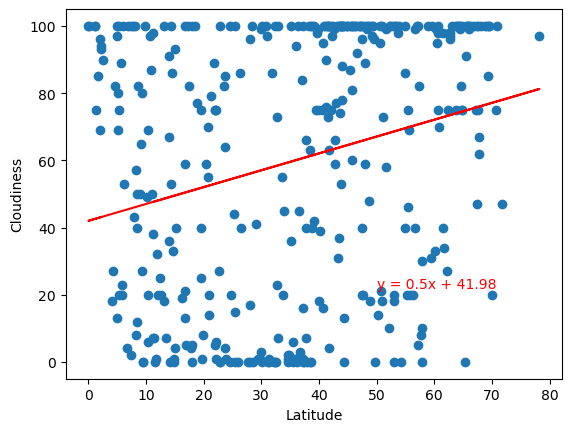

In [42]:
# Northern Hemisphere
# Build scatter plot for latitude vs. Cloudiness
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Run Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,22),fontsize=10,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04697934523503627


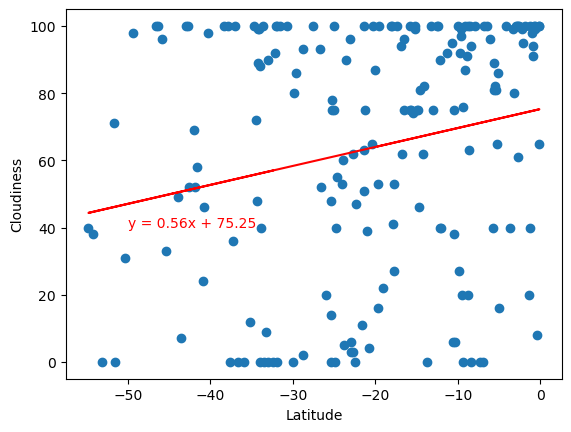

In [43]:
# Build scatter plot for latitude vs. Cloudiness
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Run Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=10,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Northern Hemisphere dataset shows an increase of Cloudiness as the Latitude increases. The values do not have any correlation with a low r-value and having heavy clusters. The points have no linearity. 

The Southern Hemisphere dataset shows an increase of Cloudiness as the Latitude increases. The values do not have any correlation with a low r-value and having heavy clusters. The points have no linearity.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0019653995308259605


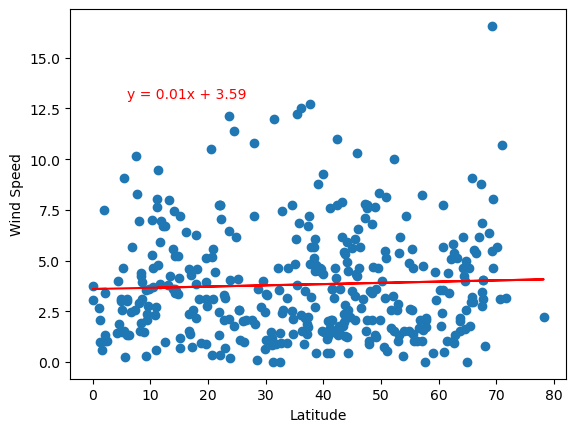

In [47]:
# Build scatter plot for latitude vs. Wind Speed
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#Run Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,13),fontsize=10,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.12000789663804945


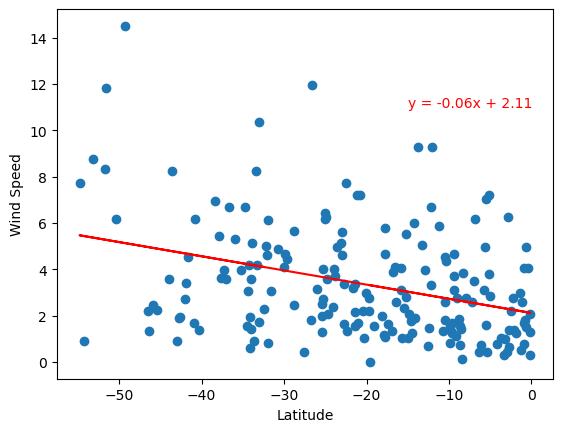

In [48]:
# Build scatter plot for latitude vs. Wind Speed
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#Run Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,11),fontsize=10,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Northern Hemisphere dataset shows a very slight increase of Wind Speed as the Latitude increases. The values do not have any correlation with a low r-value and having heavy clusters. The points have no linearity.

The Southern Hemisphere dataset shows a slight decrease of Windspeed as the Latitude increases. The values have a correlation with a low r-value, the values get closer as you get to higher latitudes. The points have a slight linearity.